In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

# Data Imports

In [3]:
Harris_i = pd.read_csv('Data_Folder/HarrisPartI.csv')
Harris_ii = pd.read_csv('Data_Folder/HarrisPartII.csv')
Harris_iii = pd.read_csv('Data_Folder/HarrisPartIII.csv')
VandenBerg = pd.read_csv('Data_Folder/vandenBerg_table2.csv')
Krause21 = pd.read_csv('Data_Folder/Krause21.csv')

In [4]:
#Combine harris i and iii into 1 dataframe

#exclude id column from harris iii
Harris_iii_IDnone = Harris_iii.T.drop('ID')

#Combine Dataframes
Harris_i_iii = Harris_i.join(Harris_iii_IDnone.T)

# Figures

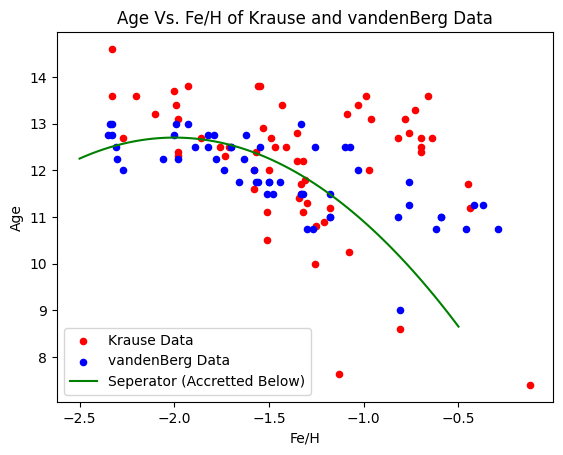

In [5]:
## Creating FeH / Age plot for Krause and vandenBerg data

#setting x and y data from Krause for FeH/Age plots
Krause21x = pd.read_csv('Data_folder/Krause21.csv', usecols=['FeH'])
Krause21y = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Age'])
#setting x and y data from vandenBerg for FeH/Age plots
VandenBergx = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['FeH'])
VandenBergy = pd.read_csv('Data_Folder/vandenBerg_table2.csv', usecols=['Age'])

#Plotting data (Age/FeH) for comparison with (Belokurov, Kravtsov, 2024) - ["In-situ vs. Accretted..." (Figure 3)]
plt.scatter(Krause21x, Krause21y, color='red', label='Krause Data', s=20)
plt.scatter(VandenBergx, VandenBergy, color='blue', label='vandenBerg Data', s=20)

#Creating line
b = 12.7  #peak of curve
m = -1.8  #tightness of curve
x = np.linspace(-2.5, -0.5, num=100)  #limits of curve
y = m*(x+2)**2+b  #the curve (+2 shifts curve left)

#Adding the line to plot
Accretted_Line = plt.plot(x, y, color='green', label='Seperator (Accretted Below)')

plt.legend()
plt.xlabel('Fe/H')
plt.ylabel('Age')
plt.title('Age Vs. Fe/H of Krause and vandenBerg Data')

plt.show()

In [7]:
## Identifying the data from the FeH / Age plot for Krause and vandenBerg data

#Changing columns names to be able to compare in mask
Krause21x_reset = Krause21x.rename(columns={'FeH': 'Accretted'})
Krause21y_reset = Krause21y.rename(columns={'Age': 'Accretted'})
VandenBergx_reset = VandenBergx.rename(columns={'FeH': 'Accretted'})
VandenBergy_reset = VandenBergy.rename(columns={'Age': 'Accretted'})

#Creating mask (selects all data less than created line as 'True')
mask1 = Krause21y_reset < m*(Krause21x_reset+2)**2+b 
#print(mask1)
mask2 = VandenBergy_reset < m*(VandenBergx_reset+2)**2+b
#print(mask2)

#Joining mask dataframe with object name
Krause21_FeHAge_data = pd.read_csv('Data_Folder/Krause21.csv', usecols=['Object']).join(mask1)
#print(Krause21_FeHAge_data)
VandenBerg_FeHAge_data = pd.read_csv('Data_Folder/vandenBerg_table2.csv',usecols=['#NGC']).join(mask2)
#print(VandenBerg_FeHAge_data)

#Filtering out False values
filtered_Krause21_FeHAge_data = Krause21_FeHAge_data[Krause21_FeHAge_data.Accretted]
print(filtered_Krause21_FeHAge_data)
filtered_VandenBerg_FeHAge_data = VandenBerg_FeHAge_data[VandenBerg_FeHAge_data.Accretted]
print(filtered_VandenBerg_FeHAge_data)

         Object  Accretted
2        NGC362       True
3       NGC1261       True
4       NGC1851       True
5       NGC1904       True
6       NGC2298       True
7       NGC2808       True
8       NGC3201       True
10      NGC4833       True
12      NGC5053       True
13      NGC5272       True
16      NGC5897       True
17      NGC5904       True
21      NGC6101       True
23      NGC6139       True
26      NGC6205       True
38      NGC6535       True
40      NGC6584       True
46      NGC6715       True
53      NGC6934       True
54      NGC6981       True
56      NGC7089       True
58  Ruprecht106       True
60    Palomar12       True
    #NGC  Accretted
1    288       True
2    362       True
3   1261       True
4   1851       True
5   2808       True
6   3201       True
7   4147       True
8   4590       True
9   4833       True
10  5024       True
11  5053       True
12  5272       True
13  5286       True
14  5466       True
15  5904       True
17  5986       True
18  6101    

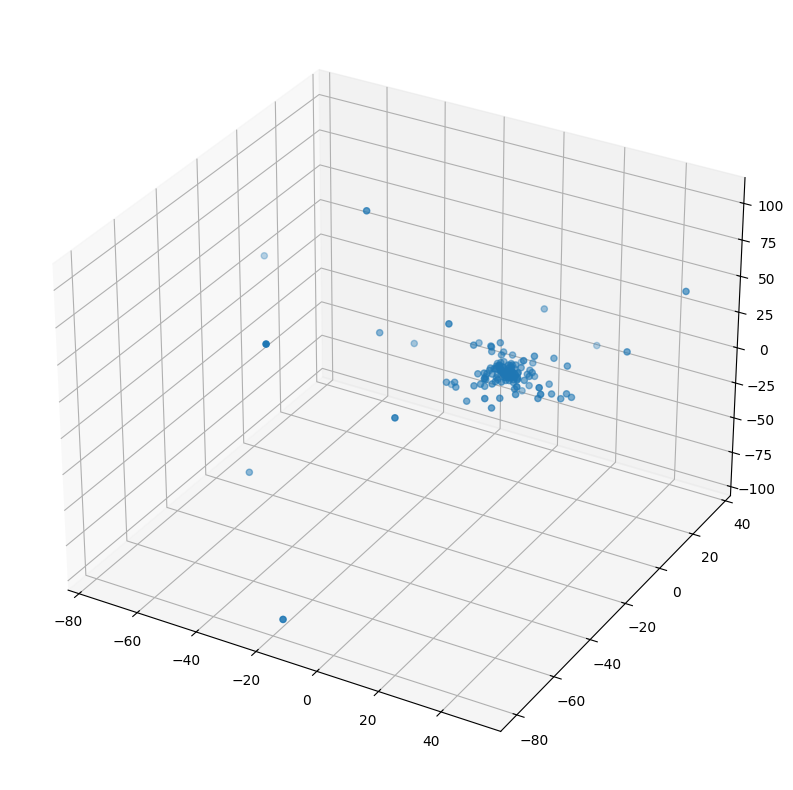

In [6]:
# The aim of this block of code is to create a 3D scatterplot of the Harris Part 1 data.
# This can then be used to identify GC near the outer halo which are likely globular clusters

# This code takes Part 1 of the Harris data and seperates the X, Y, and Z coordinates into seperate lists
HarrisIX = pd.read_csv('Data_folder/HarrisPartI.csv', usecols=['X'])
HarrisIY = pd.read_csv('Data_folder/HarrisPartI.csv', usecols=['Y'])
HarrisIZ = pd.read_csv('Data_folder/HarrisPartI.csv', usecols=['Z'])

# These next lines of code create a 3D scatterplot of the X, Y, and Z coordinates:
# The figsize parameters have been chosen by scanning the HarrisPartI.csv file and checking
# a rough range of the largest values
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# These two lines make a visual graph of the scatterplot
ax.scatter(HarrisIX, HarrisIY, HarrisIZ)
plt.show()

In [ ]:
# This block of code plots the Harris Part I in the X, Y axis
# The scatterplots include a cursor meaning we can pick out the accreted globular clusters off the scatterplot

# First we need to import the cursor feature from the matplotlib package:
from matplotlib.widgets import Cursor
import matplotlib.pyplot as plt


# Then, we need to define the figure and axis or else the cursor function does not work:
fig, ax = plt.subplots()

# Now we can plot Harris I in X, Y and add the cursor
ax.scatter(HarrisIX, HarrisIY)
ax.set_title('Harris Part I in X, Y plane')
cursor = Cursor(ax, useblit=True, color='red', linewidth=1)
plt.show()
plt.ion

In [ ]:
# Harris Part I in the X, Z axis
# First we import the cursor feature from the matplotlib package:
from matplotlib.widgets import Cursor
import matplotlib.pyplot as plt

# Then, we  define the figure and axis
fig, ax = plt.subplots()

# Next we can plot Harris I in X, Z
ax.scatter(HarrisIX, HarrisIZ)
ax.set_title('Harris Part I in X, Z plane')
cursor = Cursor(ax, useblit=True, color='red', linewidth=1)
plt.show()
plt.ion

The plots produced in the above three cells do not have labelled axes. which would be useful for the final video

In [ ]:
# Harris Part I in the Y, Z axis
# First we import the cursor feature from the matplotlib package:
from matplotlib.widgets import Cursor
import matplotlib.pyplot as plt

# Then, we  define the figure and axis
fig, ax = plt.subplots()

# Next we can plot Harris I in X, Z
ax.scatter(HarrisIY, HarrisIZ)
ax.set_title('Harris Part I in Y, Z plane')
cursor = Cursor(ax, useblit=True, color='red', linewidth=1)
plt.show()
plt.ion

In [ ]:
# The following code will be used as a filter
# Using the scatterplots graphed above, we can pick out potential accreted globular clusters (of which there should be about 5 based on the 3D scatterplot)
# essentially the 2D scatterplots above help us choose boundaries where we can see the galactic halo. In the halo, we will find the accreted GCs

# First, we should set the limits on X, Y, Z for accreted GCs
x_min = 35
x_max = -13
y_min = 18
y_max = -35
z_min = 11
z_max = -50

# Now we set up the arrays we are going to use below
x_values = HarrisIX.values #the '.values' Converts HarrisIX to a numpy array from a pandas data frame - which makes the filter below work
y_values = HarrisIY.values
z_values = HarrisIZ.values
cluster_names = pd.read_csv('Data_folder/HarrisPartI.csv', usecols=['ID']).to_numpy() #the '.to_numpy()' defines cluster_names as a list of strings


# Need a way of saving the names of the accreted globular clusters to a list
accreted_gcs = []

# Now, we can filter the data based on these boundaries
# Let's go through HarrisIX first:
i = 0
while i < len(x_values):
    if x_values[i] <= x_max or x_values[i] >= x_min:
        accreted_gcs.append(cluster_names[i])
    i = i + 1
# This is fine for the X values because we are starting with an empty array
# Going forward, we will need to check that the gc added to the list of accreted gcs is not already entered
# The next cell writes a function for this.

In [ ]:
def duplicate_detecor(some_list, some_name):
    k = 0
    duplicates = 0
    while k < len(some_list):
        if some_name == some_list[k]:
            duplicates = duplicates + 1
            k = k + 1
        else:
            k = k + 1
    return (duplicates)

In [ ]:
# Now we can pick out any additional globular clusters for the y values, using the detect duplicates function
# Let's go through HarrisIY next:
i = 0
while i < len(y_values):
    if y_values[i] <= y_max or y_values[i] >= y_min:
        if duplicate_detecor(accreted_gcs, cluster_names[i]) == 0:
            accreted_gcs.append(cluster_names[i])
    i = i + 1

# Finally, we can also do this for the globular clusters with z values very distant from the centre:
i = 0
while i < len(z_values):
    if z_values[i] <= z_max or z_values[i] >= z_min:
        if duplicate_detecor(accreted_gcs, cluster_names[i]) == 0:
            accreted_gcs.append(cluster_names[i])
    i = i + 1
    
# Lastly, we can print off the list of accreted galaxy clusters in a nicer format. 
i = 0
for i in range(len(accreted_gcs)):
    print(accreted_gcs[i][0])